In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read dataset
df = pd.read_csv("data/airquality.csv")
df.head(5)

StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  24-11-2017  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  25-11-2017  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  26-11-2017  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  27-11-2017  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001  28-11-2017  64.18  104.09  2.56  28.07  17.01  11.42  0.09   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  10.76  109.26     0.17     5.92    0.10    NaN        NaN  
1  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  
2  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  
3  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  
4  19.00  138.18     0.17     5.02    0.07  188.0   Moderate

In [3]:
# a. Create data subsets (Selecting PM2.5, PM10, NO, NO2, O3 columns and index range)
subset = df.loc[11:49, ['PM2.5', 'PM10', 'NO', 'NO2', 'O3']]
subset  # 🔹 Subset with specified columns and index range

PM2.5    PM10     NO    NO2      O3
11   88.36  121.77   3.70  20.23  117.93
12   96.83  139.36   1.60  25.65  117.21
13  117.46  181.64   4.26  41.10   94.63
14  122.88  208.86   5.56  54.87   68.60
15   74.28  141.22   6.10  44.97   60.62
16   50.32  102.77   1.73  33.85   68.15
17   58.47  115.27   4.93  41.64   73.75
18   89.35  131.48   7.97  42.10   44.67
19   64.42   99.74   7.20  34.78   50.16
20   69.40   98.94   5.81  29.97   55.00
21   71.07  109.65   4.19  25.00   79.04
22   79.76  129.81   8.77  40.92   73.17
23  108.06  167.62   7.29  47.05   70.74
24  100.75  172.04   7.63  53.94   59.20
25  106.25  171.56   2.74  43.09   66.90
26   83.79  141.83   6.77  47.47   77.54
27   79.98  147.74   7.02  49.55   79.71
28   76.27  152.59   7.51  56.00   56.97
29   86.50  147.95   5.24  42.00   73.09
30  100.62  167.75   3.75  47.68   62.78
31  110.73  171.47   1.69  31.06   76.07
32  107.70  170.21   4.97  43.54   64.60
33  104.81  192.20   9.59  63.48   63.87
34   89.95  175.16  10.95  64.53   62.49
35   74.58  138.60   6.14  46.65   67.11
36   56.68  109.33   4.60  33.26   66.91
37   61.03  131.62   5.51  39.50   61.91
38   59.03  108.83   3.45  23.36   87.55
39   61.88  109.82   3.87  23.14   81.38
40   71.57  137.48   5.01  39.99   80.30
41   92.44  174.75   5.84  53.79   71.09
42   92.90  162.69   6.38  56.39   68.79
43   85.15  151.97  11.05  61.55   90.80
44   81.47  145.68   6.45  46.90   96.49
45   81.58  132.66   3.97  34.93  118.91
46   79.56  146.64   4.44  37.58  137.61
47   87.43  155.95   3.90  37.31  121.72
48   87.33  153.97   3.95  42.52  106.17
49  110.39  182.54   4.54  52.24   82.20

In [4]:
# b. Replace NaN values rationally
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())  # Replace NaN in PM2.5 with mean
df['PM10'] = df['PM10'].fillna(df['PM10'].median())  # Replace NaN in PM10 with median
df['NO'] = df['NO'].fillna(df['NO'].mode()[0])  # Replace NaN in NO with mode
df['NO2'] = df['NO2'].fillna(df['NO2'].median())  # Replace NaN in NO2 with median
df['O3'] = df['O3'].fillna(df['O3'].mean())  # Replace NaN in O3 with mean
df  # 🔹 Data after replacing NaN values

StationId        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0          AP001  24-11-2017  71.36  115.75   1.75   20.65   12.40  12.19   
1          AP001  25-11-2017  81.40  124.50   1.44   20.50   12.08  10.72   
2          AP001  26-11-2017  78.32  129.06   1.26   26.00   14.85  10.28   
3          AP001  27-11-2017  88.76  135.32   6.60   30.85   21.77  12.91   
4          AP001  28-11-2017  64.18  104.09   2.56   28.07   17.01  11.42   
...          ...         ...    ...     ...    ...     ...     ...    ...   
108030     WB013  27-06-2020   8.65   16.46   2.50   27.21     NaN    NaN   
108031     WB013  28-06-2020  11.80   18.47   2.50   27.21     NaN    NaN   
108032     WB013  29-06-2020  18.60   32.26  13.65  200.87  214.20  11.40   
108033     WB013  30-06-2020  16.07   39.30   7.56   29.13   36.69  29.26   
108034     WB013  01-07-2020  10.50   36.50   7.78   22.50   30.25  27.23   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0       0.10  10.76  109.26     0.17     5.92    0.10    NaN           NaN  
1       0.12  15.24  127.09     0.20     6.50    0.06  184.0      Moderate  
2       0.14  26.96  117.44     0.22     7.95    0.08  197.0      Moderate  
3       0.11  33.59  111.81     0.29     7.63    0.12  198.0      Moderate  
4       0.09  19.00  138.18     0.17     5.02    0.07  188.0      Moderate  
...      ...    ...     ...      ...      ...     ...    ...           ...  
108030  0.69   4.36   30.59     1.32     7.26     NaN   50.0          Good  
108031  0.68   3.49   38.95     1.42     7.92     NaN   65.0  Satisfactory  
108032  0.78   5.12   38.17     3.52     8.64     NaN   63.0  Satisfactory  
108033  0.69   5.88   29.64     1.86     8.40     NaN   57.0  Satisfactory  
108034  0.58   2.80   13.10     1.31     7.39     NaN   59.0  Satisfactory  

[108035 rows x 16 columns]

In [5]:
# c. Data transformation - Apply Min-Max Normalization on PM2.5
scaler = MinMaxScaler()
df['PM2.5'] = scaler.fit_transform(df[['PM2.5']])
df[['PM2.5']]  # 🔹 After Min-Max Normalization on PM2.5

PM2.5
0       0.071341
1       0.081382
2       0.078302
3       0.088742
4       0.064161
...          ...
108030  0.008630
108031  0.011780
108032  0.018580
108033  0.016050
108034  0.010480

[108035 rows x 1 columns]

C:\Users\Asus\AppData\Local\Temp\ipykernel_4452\3537803226.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month  # Extract month from 'Date'


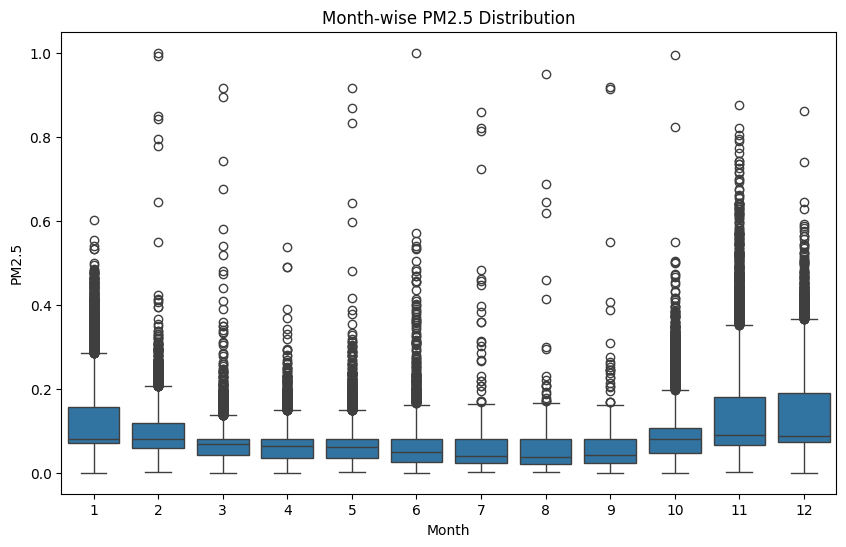

In [6]:
# d. Plot Month-wise Temperature using Matplotlib/Seaborn
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.month  # Extract month from 'Date'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='PM2.5', data=df)  # Plot using seaborn
plt.title('Month-wise PM2.5 Distribution')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.show()  # 🔹 Month-wise PM2.5 distribution plot